In [155]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt


In [156]:
"from subprocess import check_output
print(check_output(["ls"]).decode("utf8"))

SyntaxError: unterminated string literal (detected at line 1) (1386939459.py, line 1)

In [157]:
dframe = pd.read_csv("/home/jovyan/work/data/health/filtered_full_relabel_i2b2.csv", encoding = "ISO-8859-1")

dframe.head(30)

,sentence_idx,word,tag
0,1,Record,O
1,1,date,O
2,1,:,O
3,1,2067,DATE
4,1,-,DATE
5,1,05,DATE
6,1,-,DATE
7,1,03,DATE
8,1,Narrative,O
9,1,History,O


In [158]:
def get_sentences(dataset):
    n_sent = 1
    # print(dataset[0])
    grouped = dataset.groupby("sentence_idx").apply(lambda s: [(w, t) for w, t in zip(s["word"].values.tolist(),
                                                                                      s["tag"].values.tolist())])
    sentences = [s for s in grouped]

    def get_next():
        nonlocal n_sent
        try:
            s = grouped["Sentence: {}".format(n_sent)]
            n_sent += 1
            return s
        except:
            return None

    return sentences, get_next


In [159]:
sentences, get_next = get_sentences(dframe)

In [160]:
def get_max_len(sentences):
    return max([len(s) for s in sentences])

In [161]:
def count_sentences_with_length(sentences, threshold):
    count = 0
    for s in sentences:
        if len(s) > threshold:
            count += 1
    return count

In [162]:
maxlen = get_max_len(sentences)
print ('Maximum sequence length:', maxlen)

Maximum sequence length: 99


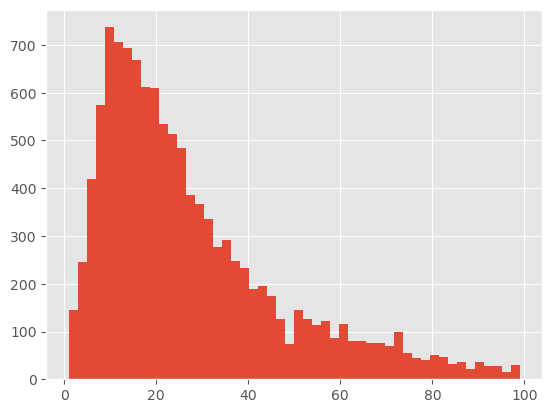

In [163]:
plt.style.use("ggplot")
plt.hist([len(s) for s in sentences], bins=50)
plt.show()

In [164]:
words = list(set(dframe["word"].values))
words.append("ENDPAD")

In [165]:
print(list(set(dframe["word"].values)))

['Will', '10/29/92', '1/3/72', 'buy', 'conditions', 'Godfrey', '09/25/15', 'Quan', 'Woodstock', 'membranoproliferative', 'Younker', 'cream', 'ANATOMIC', '04:36', 'Mom-', 'returns', 'West', 'Railway', 'sessile', 'FOLLOWED', 'BP', 'Phipps', 'Discharged', '01/13/2066', 'Alcala', '963', '/turpin', 'Hudsen', 'cramp', 'Plasterer', 'Susceptible', '12:06', 'narcotic', '8.0', 'physiologic', '2/92', '09/28/79', 'swallowing', 'Carrizoza', 'safer', 'Chavez', '09/02/02', 'THAN', 'Accession', 'paring', '09:43', 'towards', 'Morbid', 'EDVISIT^24152563^Pierre', '12/07/89', '15:52', 'Edwin', 'EB83', 'alaska', '13.5', 'Lyndonville', '43', 'TNG', 'Yon', 'deferred', 'schizophrenia', 'file', 'MRegistration', 'qj571', 'Emigrated', 'c.c', 'MR8', 'WESTYN', '135/64', 'Sorensen', 'Lactose', '88H', '10:34', 'verbal', '97.7', 'AMA', '22:28', 'number', '47190847(JMH', 'Aniso', 'VELASQUEZ', '17:01', '3/03/2090', 'Indiana^06/29/86^GAY', '7/17/91', 'Ex', 'Recent', 'DOA', 'die', '5285833', 'completing', '8/24/91', 'ran

In [166]:
n_words = len(words); n_words

27508

In [167]:
tags = list(set(dframe["tag"].values))
tags

['B-STREET',
 'I-STATE',
 'IDNUM',
 'I-PER',
 'B-MEDICALRECORD',
 'I-HOSPITAL',
 'I-PROFESSION',
 'USERNAME',
 'DATE',
 'FAX',
 'I-MEDICALRECORD',
 'CITY',
 'B-PER',
 'O',
 'B-STATE',
 'ZIP',
 'COUNTRY',
 'B-ORGANIZATION',
 'EMAIL',
 'B-HOSPITAL',
 'I-STREET',
 'B-PROFESSION',
 'I-ORGANIZATION',
 'PHONE',
 'I-AGE',
 'B-AGE']

In [168]:
n_tags = len(tags); n_tags

26

In [169]:
word2idx = {w: i for i, w in enumerate(words)}
tag2idx = {t: i for i, t in enumerate(tags)}

In [170]:
tag2idx

{'B-STREET': 0,
 'I-STATE': 1,
 'IDNUM': 2,
 'I-PER': 3,
 'B-MEDICALRECORD': 4,
 'I-HOSPITAL': 5,
 'I-PROFESSION': 6,
 'USERNAME': 7,
 'DATE': 8,
 'FAX': 9,
 'I-MEDICALRECORD': 10,
 'CITY': 11,
 'B-PER': 12,
 'O': 13,
 'B-STATE': 14,
 'ZIP': 15,
 'COUNTRY': 16,
 'B-ORGANIZATION': 17,
 'EMAIL': 18,
 'B-HOSPITAL': 19,
 'I-STREET': 20,
 'B-PROFESSION': 21,
 'I-ORGANIZATION': 22,
 'PHONE': 23,
 'I-AGE': 24,
 'B-AGE': 25}

In [171]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [172]:
X = [[word2idx[w[0]] for w in s] for s in sentences]

In [173]:
X = pad_sequences(maxlen=maxlen, sequences=X, padding="post",value=n_words - 1)

In [174]:
y = [[tag2idx[w[1]] for w in s] for s in sentences]

In [175]:
y = pad_sequences(maxlen=maxlen, sequences=y, padding="post", value=tag2idx["O"])

In [176]:
from keras.utils import to_categorical
y = [to_categorical(i, num_classes=n_tags) for i in y]

In [177]:
def encoding(data):
    # dframe = lstmFun.add_sentence_id_column(self.data)
    sentences, get_next = get_sentences(data)
    maxlen = get_max_len(sentences)
    print('Maximum sequence length:', maxlen)

    words = list(set(data["word"].values))
    words.append("ENDPAD")
    n_words = len(words);

    tags = list(set(data["tag"].values))
    n_tags = len(tags)

    word2idx = {w: i for i, w in enumerate(words)}
    tag2idx = {t: i for i, t in enumerate(tags)}

    x = [[word2idx[w[0]] for w in s] for s in sentences]
    x = pad_sequences(maxlen=maxlen, sequences=x, padding="post", value=n_words - 1)

    y = [[tag2idx[w[1]] for w in s] for s in sentences]
    y = pad_sequences(maxlen=maxlen, sequences=y, padding="post", value=tag2idx["O"])
    y = [to_categorical(i, num_classes=n_tags) for i in y]
    return x, y, maxlen, n_words, n_tags

In [178]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [179]:
from keras.models import Model
from tensorflow.keras.layers import Input
from keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional

In [180]:
input = Input(shape=(maxlen,))
model = Embedding(input_dim=n_words, output_dim=maxlen, input_length=maxlen)(input)
model = Dropout(0.1)(model)
model = Bidirectional(LSTM(units=100, return_sequences=True, recurrent_dropout=0.1))(model)
out = TimeDistributed(Dense(n_tags, activation="softmax"))(model)  # softmax output layer

In [181]:
input_t = Input(shape=(maxlen,))
model = Embedding(input_dim=n_words, output_dim=100, input_length=maxlen)(input_t)
model = Dropout(0.1)(model)
model = Bidirectional(LSTM(units=100, return_sequences=True, recurrent_dropout=0.1))(model)
out = TimeDistributed(Dense(n_tags, activation="softmax"))(model)  # softmax output layer
# model = Bidirectional(LSTM(units=100, return_sequences=True, recurrent_dropout=0.1))(model)
# crf = CRF(n_tags)  # CRF layer with n_tags output units
# out = crf(model)  # Apply CRF layer to the output of LSTM
model = Model(input_t, out)

In [182]:
from keras.losses import CategoricalCrossentropy
cross_entropy_loss = CategoricalCrossentropy()
model = Model(input_t, out)
model.compile(optimizer="adam", loss=cross_entropy_loss, metrics=["categorical_accuracy"])

In [183]:
history = model.fit(X_train, np.array(y_train), batch_size=32, epochs=3, verbose=1)

Epoch 1/3
216/216 [==============================] - 34s 139ms/step - loss: 0.3208 - categorical_accuracy: 0.9552
Epoch 2/3
216/216 [==============================] - 31s 143ms/step - loss: 0.1167 - categorical_accuracy: 0.9693
Epoch 3/3
216/216 [==============================] - 32s 147ms/step - loss: 0.0695 - categorical_accuracy: 0.9806


In [184]:
# Save Model
dir = "/home/jovyan/work/data/output/LSTM_health4"
model.save(dir)
# import tensorflow as tf
# model = tf.keras.models.load_model(dir)

2023-06-18 21:14:53.288649: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'while/Placeholder_2' with dtype float and shape [?,100]
	 [[{{node while/Placeholder_2}}]]
2023-06-18 21:14:53.482937: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'while/Placeholder_2' with dtype float and shape [?,100]
	 [[{{node while/Placeholder_2}}]]
2023-06-18 21:14:53.517380: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and 

INFO:tensorflow:Assets written to: /home/jovyan/work/data/output/LSTM_health4/assets


INFO:tensorflow:Assets written to: /home/jovyan/work/data/output/LSTM_health4/assets


In [185]:
# Evaluation
loss, accuracy = model.evaluate(X_test, np.array(y_test))
print("Loss: {:.4f}".format(loss))
print("Accuracy: {:.2f}%".format(accuracy * 100))

144/144 [==============================] - 4s 28ms/step - loss: 0.0715 - categorical_accuracy: 0.9804
Loss: 0.0715
Accuracy: 98.04%


In [186]:
# Get the predicted labels
y_pred = model.predict(X_test)
y_pred_indices = np.argmax(y_pred, axis=-1)

y_pred_flattened = y_pred_indices.flatten()

144/144 [==============================] - 4s 26ms/step


In [190]:
X_test.shape

(4596, 99)

In [187]:
y_true_indices = np.argmax(y_test, axis=-1)
y_true_flattened = y_true_indices.flatten()

In [188]:
precision_per_tag = {}
recall_per_tag = {}
f1_per_tag = {}
for tag, id in tag2idx.items():
    true_positives = np.sum((y_pred_flattened == id) & (y_true_flattened == id))
    false_positives = np.sum((y_pred_flattened == id) & (y_true_flattened != id))
    false_negatives = np.sum((y_pred_flattened != id) & (y_true_flattened == id))

    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
    recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    precision_per_tag[tag] = round(precision, 2) * 100
    recall_per_tag[tag] = round(recall, 2) * 100
    f1_per_tag[tag] = round(f1_score, 2) * 100

for tag, id in tag2idx.items():
    print("Tag:", tag)
    print("Precision: ", precision_per_tag[tag])
    print("F1 Score:", f1_per_tag[tag])
    print("recall:", recall_per_tag[tag])
    print()



Tag: B-STREET
Precision:  0
F1 Score: 0
recall: 0.0

Tag: I-STATE
Precision:  0
F1 Score: 0
recall: 0.0

Tag: IDNUM
Precision:  75.0
F1 Score: 28.999999999999996
recall: 18.0

Tag: I-PER
Precision:  60.0
F1 Score: 62.0
recall: 63.0

Tag: B-MEDICALRECORD
Precision:  100.0
F1 Score: 1.0
recall: 0.0

Tag: I-HOSPITAL
Precision:  89.0
F1 Score: 15.0
recall: 8.0

Tag: I-PROFESSION
Precision:  0
F1 Score: 0
recall: 0.0

Tag: USERNAME
Precision:  0
F1 Score: 0
recall: 0.0

Tag: DATE
Precision:  79.0
F1 Score: 78.0
recall: 76.0

Tag: FAX
Precision:  0
F1 Score: 0
recall: 0.0

Tag: I-MEDICALRECORD
Precision:  45.0
F1 Score: 47.0
recall: 49.0

Tag: CITY
Precision:  0
F1 Score: 0
recall: 0.0

Tag: B-PER
Precision:  70.0
F1 Score: 70.0
recall: 70.0

Tag: O
Precision:  99.0
F1 Score: 99.0
recall: 100.0

Tag: B-STATE
Precision:  0
F1 Score: 0
recall: 0.0

Tag: ZIP
Precision:  0
F1 Score: 0
recall: 0.0

Tag: COUNTRY
Precision:  0
F1 Score: 0
recall: 0.0

Tag: B-ORGANIZATION
Precision:  0
F1 Score: 0
r

In [41]:
unique_values, counts = np.unique(y_pred_flattened, return_counts=True)
for value, count in zip(unique_values, counts):
    print(f"{[value]}: {count}")


[2]: 28
[4]: 12147003
[11]: 458
[15]: 10
[16]: 15
[31]: 22


In [37]:
unique_values, counts = np.unique(y_true_flattened, return_counts=True)
for value, count in zip(unique_values, counts):
    print(f"{value}: {count}")

0: 162
2: 5
3: 1586
4: 1
5: 9
6: 1
7: 196
8: 267
9: 899
10: 67
11: 401
12: 841
13: 128
14: 1
15: 3295
16: 3
17: 6
18: 1889
19: 85
20: 878
21: 7
22: 1
23: 560
24: 215
25: 12127489
26: 150
27: 5007
28: 178
29: 209
30: 3
31: 19
32: 122
33: 2
34: 8
35: 87
36: 939
37: 319
38: 158
39: 5
40: 385
41: 88
42: 28
43: 837


In [50]:
tag2idx

{'B-STREET': 0,
 'B-BIOID': 1,
 'I-ZIP': 2,
 'I-DOCTOR': 3,
 'I-HEALTHPLAN': 4,
 'I-STATE': 5,
 'B-URL': 6,
 'I-IDNUM': 7,
 'B-CITY': 8,
 'B-PATIENT': 9,
 'B-COUNTRY': 10,
 'B-MEDICALRECORD': 11,
 'I-HOSPITAL': 12,
 'I-PROFESSION': 13,
 'B-HEALTHPLAN': 14,
 'I-DATE': 15,
 'I-LOCATION_OTHER': 16,
 'B-LOCATION_OTHER': 17,
 'B-DOCTOR': 18,
 'I-CITY': 19,
 'I-PATIENT': 20,
 'I-COUNTRY': 21,
 'I-DEVICE': 22,
 'I-MEDICALRECORD': 23,
 'B-STATE': 24,
 'O': 25,
 'B-ZIP': 26,
 'B-DATE': 27,
 'B-IDNUM': 28,
 'B-PHONE': 29,
 'I-URL': 30,
 'I-FAX': 31,
 'B-USERNAME': 32,
 'B-EMAIL': 33,
 'B-DEVICE': 34,
 'B-ORGANIZATION': 35,
 'B-HOSPITAL': 36,
 'I-STREET': 37,
 'B-PROFESSION': 38,
 'B-FAX': 39,
 'I-PHONE': 40,
 'I-ORGANIZATION': 41,
 'I-AGE': 42,
 'B-AGE': 43}